In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
data = pd.read_csv('/Users/geogalib/csv_files/Furniture.csv')
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [78]:
data[['profit_margin', 'discount_percentage', 'price', 'cost', 'revenue']] = data[['profit_margin', 'discount_percentage', 'price', 'cost', 'revenue']].round(2)

data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,105,27.80,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.17
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
2,379.40,276.74,32,27.06,59,21.95,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.56
3,319.40,281.84,48,11.76,45,11.01,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.07
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26


In [79]:
unique_categories = data['category'].unique()
unique_categories

array(['Bed', 'Chair', 'Table', 'Sofa', 'Desk'], dtype=object)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [81]:
data.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495216,191.930104,24.924000,30.208540,97.715600,14.947624,4.89400,5926.853660
std,130.898411,98.590733,14.050067,11.536846,57.616228,8.621574,2.55902,6902.737637
min,50.700000,26.510000,1.000000,10.020000,0.000000,0.010000,1.00000,-14214.570000
25%,159.102500,106.400000,13.000000,20.227500,50.000000,7.760000,3.00000,1216.722500
50%,277.640000,189.335000,25.000000,30.300000,94.000000,14.915000,5.00000,5523.235000
75%,387.375000,263.190000,37.000000,40.132500,147.000000,22.295000,7.00000,10233.540000
max,499.870000,447.020000,49.000000,50.000000,199.000000,29.990000,9.00000,32922.080000


In [82]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,105,27.80,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.17
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
2,379.40,276.74,32,27.06,59,21.95,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.56
3,319.40,281.84,48,11.76,45,11.01,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.07
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26


In [83]:
def format_values (x):
    if x>= 1000000:
        return f'{x/1000000:.2f}M'
    elif x>= 1000:
        return f'{x/1000:.2f}K'
    elif x<= 1000000:
        return f'{x/1000000:.2f}M'
    elif x<= 1000:
        return f'{x/1000:.2f}K'
    else:
        return f'{x:.2f}'

In [84]:
total_cost = data['cost'].sum()
format_values(total_cost)

'479.83K'

In [85]:
# Create a new DataFrame with only the negative revenue rows
negative_revenue_data = data[data['revenue'] < 0]

# To check the new DataFrame
negative_revenue_data

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26
12,424.60,288.44,5,32.07,138,10.26,8,Desk,Wood,Blue,Rural,Fall,Retail,BrandB,-1043.26
14,131.82,98.95,15,24.94,51,17.45,8,Desk,Metal,Black,Suburban,Winter,Retail,BrandC,-1415.11
20,325.33,252.79,15,22.30,57,15.80,5,Sofa,Metal,Green,Rural,Summer,Online,BrandC,-7173.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,116.96,97.73,27,16.44,122,26.36,1,Bed,Plastic,Black,Suburban,Summer,Online,BrandD,-8771.10
2490,178.60,158.99,41,10.98,109,1.49,9,Desk,Wood,Blue,Rural,Winter,Retail,BrandA,-1977.18
2495,271.55,233.25,8,14.10,102,9.79,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.94
2496,309.78,169.68,24,45.22,9,21.84,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.62


In [86]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,105,27.80,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.17
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
2,379.40,276.74,32,27.06,59,21.95,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.56
3,319.40,281.84,48,11.76,45,11.01,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.07
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26


In [87]:
total_revenue = data['revenue'].sum()
format_values(total_revenue)

'14.82M'

In [106]:
total_revenue_no_discount = data[data['discount_percentage'] >= 29.9]['revenue'].sum()
format_values(total_revenue_no_discount)

'54.12K'

In [88]:
total_loss_revenue = negative_revenue_data['revenue'].sum()
format_values(total_loss_revenue)

'-1.64M'

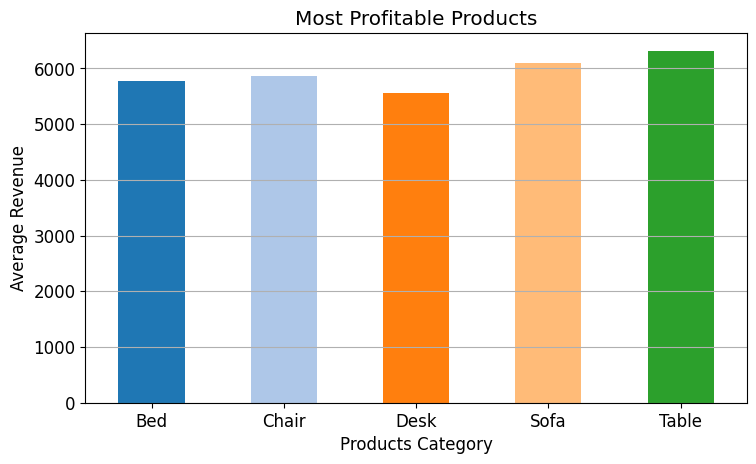

In [89]:
most_profitable_product = data.groupby('category')['revenue'].mean()
most_profitable_product.plot(kind='bar', color=plt.cm.tab20(range(len(most_profitable_product))))
plt.title('Most Profitable Products')
plt.xlabel('Products Category')
plt.ylabel('Average Revenue')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.grid(axis='y')
plt.xticks(rotation=180*2, ha='center')  # adjust rotation and alignment
fig=plt.gcf()
fig.set_size_inches(2560/300, 1440/300)
plt.savefig('Most Profitable Products', dpi=600)
plt.show()

In [90]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,105,27.80,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.17
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
2,379.40,276.74,32,27.06,59,21.95,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.56
3,319.40,281.84,48,11.76,45,11.01,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.07
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26


In [91]:
table_total_revenue = data[data['category'] == 'Table']['revenue'].sum()
format_values(table_total_revenue)

'3.37M'

In [92]:
cor_discount_revenue = data['discount_percentage'].corr(data['revenue'])
cor_discount_revenue

np.float64(-0.07854769747220752)

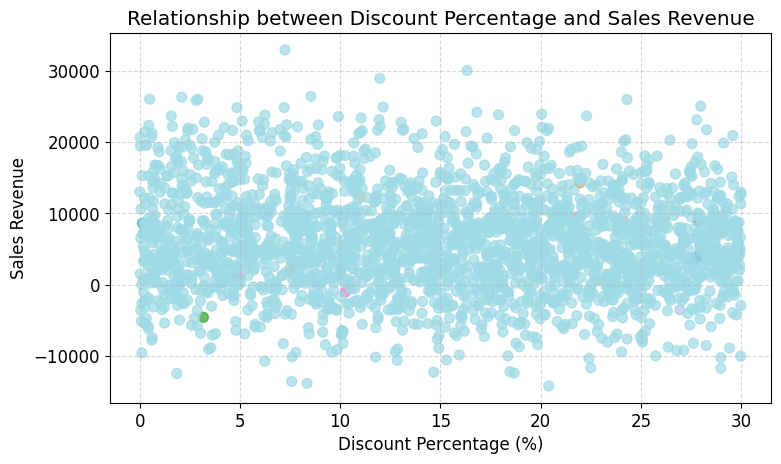

In [93]:
plt.scatter(data['discount_percentage'], data['revenue'], alpha=0.7, s=50, c=plt.cm.tab20(range(len(data))))
plt.title('Relationship between Discount Percentage and Sales Revenue')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Sales Revenue')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
fig=plt.gcf()
fig.set_size_inches(2560/300, 1440/300)
plt.savefig('Discount vs Revenue', dpi=600)
plt.show()

So even though there is a slight negative corelation we can see that the revenue is at the highest between 5-20 percent discount. 

In [94]:
data.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,105,27.80,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.17
1,477.82,385.03,7,19.42,192,26.94,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.00
2,379.40,276.74,32,27.06,59,21.95,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.56
3,319.40,281.84,48,11.76,45,11.01,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.07
4,120.21,69.74,19,41.98,35,3.18,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.26


In [95]:
# Assuming your dataset is in 'data'
# Create a new feature 'price_cost_diff'
data['price_cost_diff'] = data['price'] - data['cost']

# Define the features and target variable
X = data[['price_cost_diff', 'cost', 'sales', 'inventory', 'delivery_days', 'discount_percentage']]  # You could also include more features if relevant
y = data['revenue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can now inspect the coefficients to understand the relationship
print(f"Model Coefficients: {model.coef_}")

Mean Squared Error: 31466532.377053868
R-squared: 0.4003526425175503
Model Coefficients: [ 20.31742118  20.1909631  238.88740741  -1.42949675  20.29929322
 -51.65502521]


In [96]:
# Define the new input values
new_price = 400
new_cost = 200
new_sales = 100
new_inventory = 200
new_delivery_days = 2
new_discount_percentage = 20

# Calculate the price_cost_diff for the new input
new_price_cost_diff = new_price - new_cost

# Create a new input DataFrame with the same column names used during training
new_input = pd.DataFrame({
    'price_cost_diff': [new_price_cost_diff],
    'cost': [new_cost],
    'sales': [new_sales],
    'inventory': [new_inventory],
    'delivery_days': [new_delivery_days],
    'discount_percentage': [new_discount_percentage]
})

# Make the prediction
predicted_revenue = model.predict(new_input)

# Output the predicted revenue
print(f"Predicted Revenue: {format_values(predicted_revenue[0])}")

Predicted Revenue: 26.01K


# Furniture Store Data Analysis and Linear Regression Model

## Project Overview
This project involves the analysis of sales data from a furniture store, aimed at uncovering insights about revenue, sales, and product profitability. Additionally, a linear regression model was built to predict revenue based on available features such as price, cost, and sales. 

## Key Objectives
1. Perform basic calculations like total revenue, sales, and profit.
2. Visualize the most profitable product categories.
3. Build a machine learning model (linear regression) to predict revenue.

## Data Overview
The dataset includes information about:
- **Price, Cost, and Sales** of various furniture products.
- **Profit Margin**, **Inventory**, and **Discount Percentage**.
- Product attributes like **Category**, **Material**, and **Color**.
- Transaction details such as **Location**, **Season**, **Store Type**, and **Brand**.
- **Revenue** generated from each product sale.

## Key Findings
1. **Total Revenue and Sales**: Basic metrics like total sales and revenue were calculated to provide a foundational understanding of the store's performance.
2. **Most Profitable Products**: 
    - Using advanced data visualization techniques, the **most profitable product categories** were identified.
    - A bar chart was created to visualize average revenue per product category, with customized settings to enhance readability and presentation.

## Machine Learning Model

A linear regression model was built to predict revenue based on features such as price, cost, sales, and delivery days.
The model achieved an accuracy of 40%, which marks a solid start in the exploration of predictive modeling for this dataset.